# RANDRIANAMBININA Tokiniaina Jean Anicet Jonhia

# Projet SVM - Classification & Régression
Imports and setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.datasets import load_iris
np.random.seed(42)

# Chargement du dataset

In [ ]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Prétraitement

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# SVM RBF

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



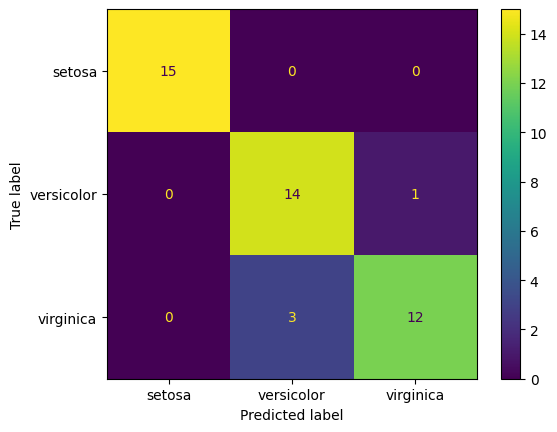

In [ ]:
model = svm.SVC(kernel='rbf', C=1.0, gamma=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=data.target_names).plot()

# GridSearchCV

In [ ]:
param_grid = {'C':[0.1,1,10], 'gamma':[0.01,0.1,1], 'kernel':['rbf','poly','linear']}
grid = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
